## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.571311  1.255744  0.673434  0.391954 -1.556557  0.085645
1 -1.279766  1.327138 -0.856567 -0.983999  1.415069 -0.626137
2  0.102973 -0.732994  1.390652  1.842893  0.036382  1.522831
3  1.113792 -0.854749  1.091235  0.024536  0.372354  0.579856
4  0.532631 -0.695411  0.844601 -0.414985  1.388740  0.348977


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0182739	total: 68.7ms	remaining: 1m 8s
1:	learn: 1.0070172	total: 69.3ms	remaining: 34.6s
2:	learn: 0.9982992	total: 69.9ms	remaining: 23.2s
3:	learn: 0.9878894	total: 70.5ms	remaining: 17.6s
4:	learn: 0.9798334	total: 71.1ms	remaining: 14.1s
5:	learn: 0.9704963	total: 71.7ms	remaining: 11.9s
6:	learn: 0.9612541	total: 72.3ms	remaining: 10.3s
7:	learn: 0.9527184	total: 72.8ms	remaining: 9.02s
8:	learn: 0.9446503	total: 73.4ms	remaining: 8.08s
9:	learn: 0.9356118	total: 74ms	remaining: 7.33s
10:	learn: 0.9269898	total: 74.6ms	remaining: 6.71s
11:	learn: 0.9187182	total: 75ms	remaining: 6.18s
12:	learn: 0.9103868	total: 75.6ms	remaining: 5.74s
13:	learn: 0.9026451	total: 76.1ms	remaining: 5.36s
14:	learn: 0.8959618	total: 76.6ms	remaining: 5.03s
15:	learn: 0.8883761	total: 77.1ms	remaining: 4.74s
16:	learn: 0.8795952	total: 77.5ms	remaining: 4.48s
17:	learn: 0.8716234	total: 78ms	remaining: 4.25s
18:	learn: 0.8639354	total: 78.4ms	remaining: 4.05

84:	learn: 0.5233704	total: 109ms	remaining: 1.17s
85:	learn: 0.5203206	total: 109ms	remaining: 1.16s
86:	learn: 0.5157880	total: 110ms	remaining: 1.15s
87:	learn: 0.5114721	total: 110ms	remaining: 1.14s
88:	learn: 0.5074348	total: 111ms	remaining: 1.13s
89:	learn: 0.5044782	total: 111ms	remaining: 1.12s
90:	learn: 0.5009344	total: 112ms	remaining: 1.11s
91:	learn: 0.4970075	total: 112ms	remaining: 1.1s
92:	learn: 0.4935310	total: 112ms	remaining: 1.09s
93:	learn: 0.4897717	total: 113ms	remaining: 1.09s
94:	learn: 0.4860578	total: 113ms	remaining: 1.08s
95:	learn: 0.4818188	total: 114ms	remaining: 1.08s
96:	learn: 0.4786612	total: 115ms	remaining: 1.07s
97:	learn: 0.4752893	total: 115ms	remaining: 1.06s
98:	learn: 0.4716489	total: 115ms	remaining: 1.05s
99:	learn: 0.4681954	total: 116ms	remaining: 1.04s
100:	learn: 0.4650164	total: 116ms	remaining: 1.03s
101:	learn: 0.4621705	total: 117ms	remaining: 1.03s
102:	learn: 0.4585006	total: 117ms	remaining: 1.02s
103:	learn: 0.4556088	total: 

252:	learn: 0.1681044	total: 188ms	remaining: 554ms
253:	learn: 0.1671587	total: 188ms	remaining: 553ms
254:	learn: 0.1659121	total: 189ms	remaining: 551ms
255:	learn: 0.1650215	total: 189ms	remaining: 549ms
256:	learn: 0.1639674	total: 189ms	remaining: 548ms
257:	learn: 0.1628133	total: 190ms	remaining: 546ms
258:	learn: 0.1620214	total: 190ms	remaining: 544ms
259:	learn: 0.1609438	total: 191ms	remaining: 542ms
260:	learn: 0.1599617	total: 191ms	remaining: 541ms
261:	learn: 0.1588420	total: 191ms	remaining: 539ms
262:	learn: 0.1578374	total: 192ms	remaining: 538ms
263:	learn: 0.1568310	total: 192ms	remaining: 537ms
264:	learn: 0.1558228	total: 193ms	remaining: 535ms
265:	learn: 0.1548575	total: 193ms	remaining: 533ms
266:	learn: 0.1540725	total: 194ms	remaining: 532ms
267:	learn: 0.1532361	total: 194ms	remaining: 530ms
268:	learn: 0.1524240	total: 195ms	remaining: 529ms
269:	learn: 0.1513558	total: 195ms	remaining: 528ms
270:	learn: 0.1502015	total: 196ms	remaining: 526ms
271:	learn: 

478:	learn: 0.0472111	total: 293ms	remaining: 318ms
479:	learn: 0.0469745	total: 293ms	remaining: 318ms
480:	learn: 0.0465867	total: 294ms	remaining: 317ms
481:	learn: 0.0462594	total: 294ms	remaining: 316ms
482:	learn: 0.0458870	total: 295ms	remaining: 316ms
483:	learn: 0.0455683	total: 295ms	remaining: 315ms
484:	learn: 0.0453618	total: 296ms	remaining: 314ms
485:	learn: 0.0450500	total: 296ms	remaining: 313ms
486:	learn: 0.0446869	total: 297ms	remaining: 312ms
487:	learn: 0.0444873	total: 297ms	remaining: 312ms
488:	learn: 0.0442626	total: 298ms	remaining: 311ms
489:	learn: 0.0440688	total: 298ms	remaining: 310ms
490:	learn: 0.0438655	total: 298ms	remaining: 309ms
491:	learn: 0.0437303	total: 299ms	remaining: 309ms
492:	learn: 0.0435814	total: 299ms	remaining: 308ms
493:	learn: 0.0434768	total: 300ms	remaining: 307ms
494:	learn: 0.0431288	total: 300ms	remaining: 306ms
495:	learn: 0.0429320	total: 301ms	remaining: 306ms
496:	learn: 0.0427262	total: 301ms	remaining: 305ms
497:	learn: 

640:	learn: 0.0214777	total: 371ms	remaining: 208ms
641:	learn: 0.0213641	total: 372ms	remaining: 207ms
642:	learn: 0.0212397	total: 372ms	remaining: 207ms
643:	learn: 0.0211631	total: 373ms	remaining: 206ms
644:	learn: 0.0210813	total: 373ms	remaining: 205ms
645:	learn: 0.0210438	total: 374ms	remaining: 205ms
646:	learn: 0.0209316	total: 374ms	remaining: 204ms
647:	learn: 0.0208519	total: 375ms	remaining: 204ms
648:	learn: 0.0207426	total: 375ms	remaining: 203ms
649:	learn: 0.0207052	total: 376ms	remaining: 202ms
650:	learn: 0.0206267	total: 376ms	remaining: 202ms
651:	learn: 0.0205074	total: 377ms	remaining: 201ms
652:	learn: 0.0204020	total: 377ms	remaining: 200ms
653:	learn: 0.0203653	total: 377ms	remaining: 200ms
654:	learn: 0.0202768	total: 378ms	remaining: 199ms
655:	learn: 0.0201605	total: 378ms	remaining: 198ms
656:	learn: 0.0200794	total: 379ms	remaining: 198ms
657:	learn: 0.0200049	total: 379ms	remaining: 197ms
658:	learn: 0.0198668	total: 380ms	remaining: 196ms
659:	learn: 

867:	learn: 0.0084245	total: 477ms	remaining: 72.5ms
868:	learn: 0.0084004	total: 477ms	remaining: 71.9ms
869:	learn: 0.0083578	total: 478ms	remaining: 71.4ms
870:	learn: 0.0083390	total: 478ms	remaining: 70.8ms
871:	learn: 0.0083045	total: 478ms	remaining: 70.2ms
872:	learn: 0.0082689	total: 479ms	remaining: 69.7ms
873:	learn: 0.0082459	total: 479ms	remaining: 69.1ms
874:	learn: 0.0082310	total: 480ms	remaining: 68.5ms
875:	learn: 0.0081900	total: 480ms	remaining: 68ms
876:	learn: 0.0081677	total: 481ms	remaining: 67.4ms
877:	learn: 0.0081441	total: 481ms	remaining: 66.8ms
878:	learn: 0.0081377	total: 482ms	remaining: 66.3ms
879:	learn: 0.0081046	total: 482ms	remaining: 65.7ms
880:	learn: 0.0080829	total: 482ms	remaining: 65.2ms
881:	learn: 0.0080432	total: 483ms	remaining: 64.6ms
882:	learn: 0.0080284	total: 483ms	remaining: 64ms
883:	learn: 0.0079964	total: 484ms	remaining: 63.5ms
884:	learn: 0.0079577	total: 484ms	remaining: 62.9ms
885:	learn: 0.0079152	total: 484ms	remaining: 62.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

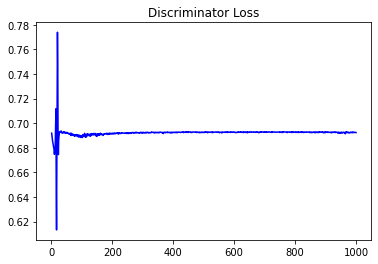

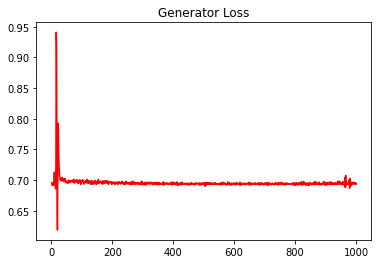

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1336924319581341


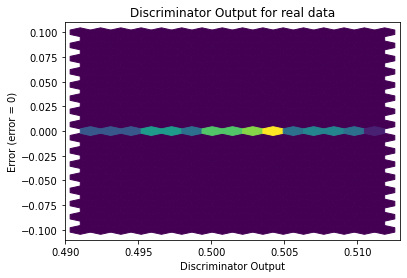

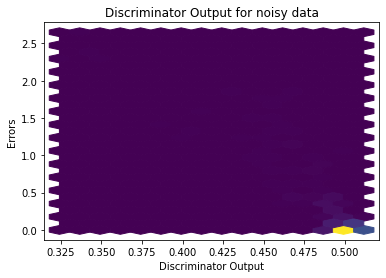

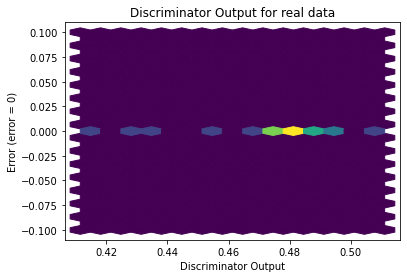

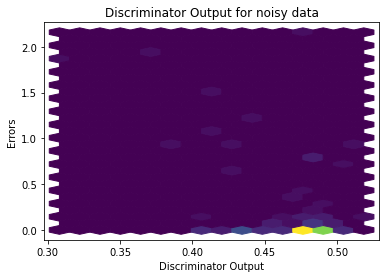

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


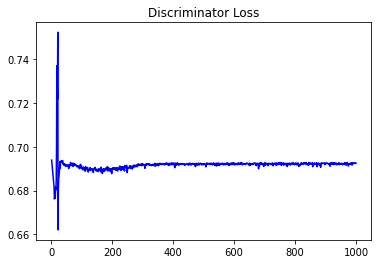

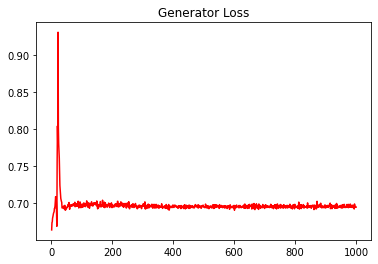

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07725031022568431


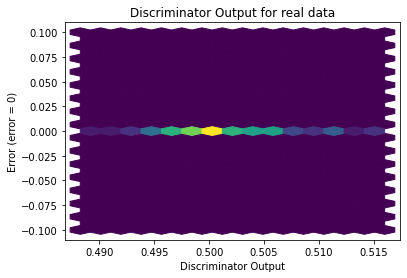

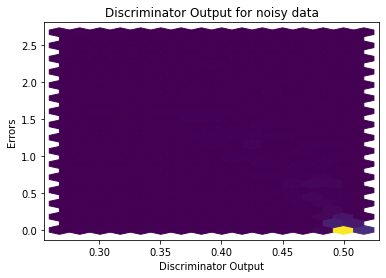

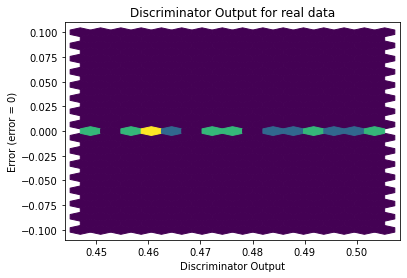

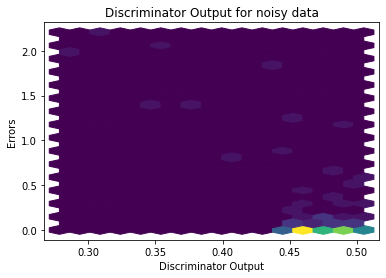

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8665]], requires_grad=True)
